In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
warnings.filterwarnings("ignore")

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
df = pd.read_csv('data/properties_2016.csv')

In [6]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


## Data columns

In [7]:
print("No of Columns: {}".format(len(df.columns)))
[col for col in df.columns]

No of Columns: 58


['parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'firep

## Number of Rows

In [8]:
'{:,}'.format(len(df))

'2,985,217'

## Join with target variable

In [9]:
target = pd.read_csv('data/train_2016_v2.csv')

In [10]:
target.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [11]:
joined_data = pd.merge(target,df,on="parcelid",how="left")

In [12]:
joined_data.transactiondate = pd.to_datetime(joined_data.transactiondate,format='%Y-%m-%d')
# year_cols = ['assessmentyear','taxdelinquencyyear','yearbuilt']
# for year_col in year_cols:
#     joined_data[year_col]=pd.to_datetime([int(val) for val in joined_data[year_col]], format="%Y")

In [13]:
# Data characteristics
joined_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15

In [14]:
joined_data.describe()


,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.027500e+04,90275.000000,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,...,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04
mean,1.298466e+07,0.011457,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,...,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13
std,2.504510e+06,0.161079,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,...,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11
min,1.071174e+07,-4.605000,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,...,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13
25%,1.155950e+07,-0.025300,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,...,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13
50%,1.254734e+07,0.006000,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,...,159.000000,1970.000000,1.000000,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,14.000000,6.037615e+13
75%,1.422755e+07,0.039200,1.000000,7.000000,872.000000,3.000000,4.000000,4.0,7.000000,3.000000,...,361.000000,1987.000000,2.000000,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,15.000000,6.059042e+13
max,1.629608e+08,4.737000,13.000000,21.000000,1555.000000,20.000000,16.000000,4.0,12.000000,20.000000,...,1366.000000,2015.000000,4.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13


## Numerical Data

In [15]:
num_cols = ['logerror', 'basementsqft',	'bathroomcnt',	'bedroomcnt',	'calculatedbathnbr', 'calculatedfinishedsquarefeet',	'finishedfloor1squarefeet',	'finishedsquarefeet12',	'finishedsquarefeet13',	'finishedsquarefeet15',	'finishedsquarefeet50',	'finishedsquarefeet6',	'fireplacecnt',	'fullbathcnt',	'garagecarcnt',	'garagetotalsqft',	'landtaxvaluedollarcnt',	'lotsizesquarefeet',	'numberofstories',	'poolcnt',	'poolsizesum',	'roomcnt',	'structuretaxvaluedollarcnt',	'taxamount',	'taxvaluedollarcnt',	'threequarterbathnbr',	'unitcnt',	'yardbuildingsqft17',	'yardbuildingsqft26']
num_data = joined_data[num_cols]

## Exploring Null and Zero Values

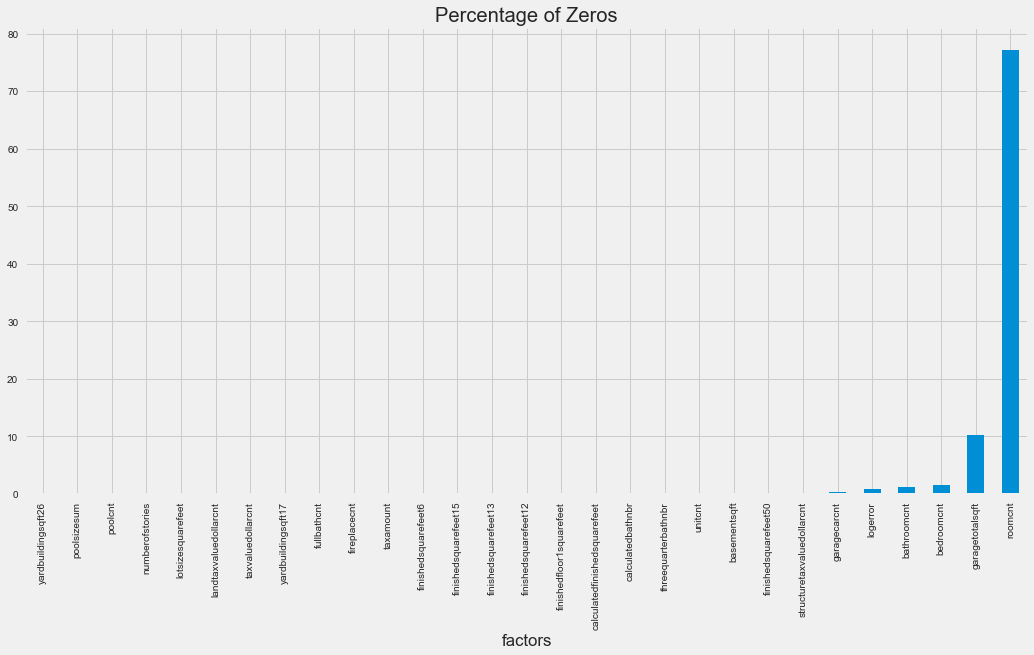

In [16]:
zeros = (num_data[:] == 0).sum()/len(num_data)*100
zeros = zeros.reset_index()

nulls = num_data.isnull().sum()/len(num_data)*100
nulls = nulls.reset_index()

stats = pd.merge(zeros, nulls, on='index')
stats.columns = ['factors', 'perc_zero', 'perc_null']      
stats.sort_values('perc_zero', inplace=True)
stats.perc_zero.index = stats.factors
ax = plt.axes()
ax.set_xlabel('Columns',fontdict={'fontsize':'large'})
stats.perc_zero.plot(kind='bar', figsize=(16,8),title="Percentage of Zeros")

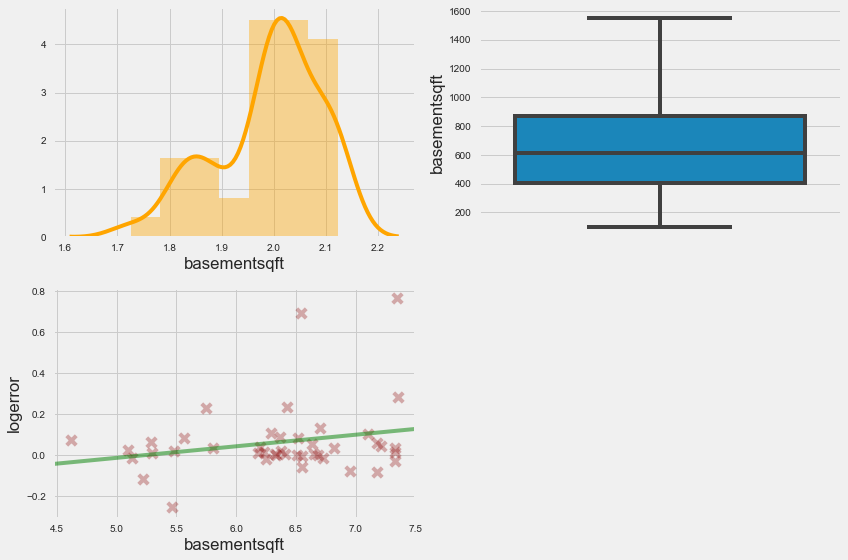

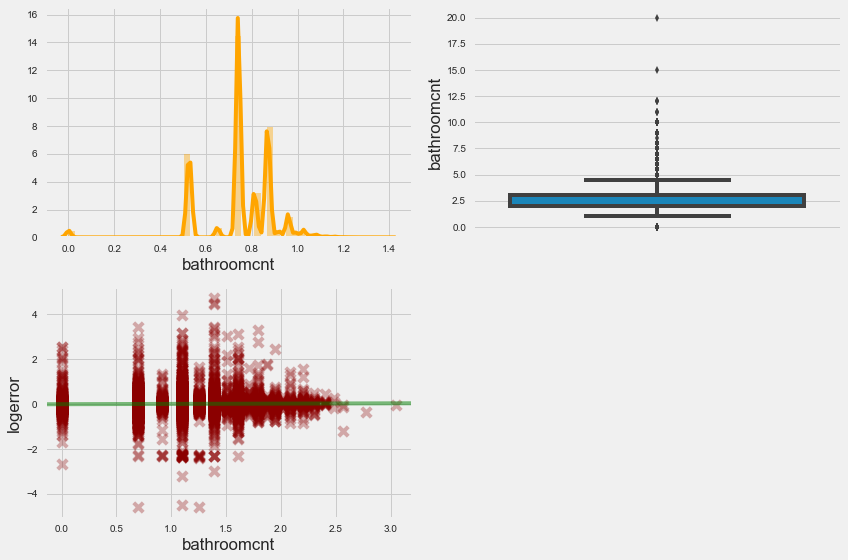

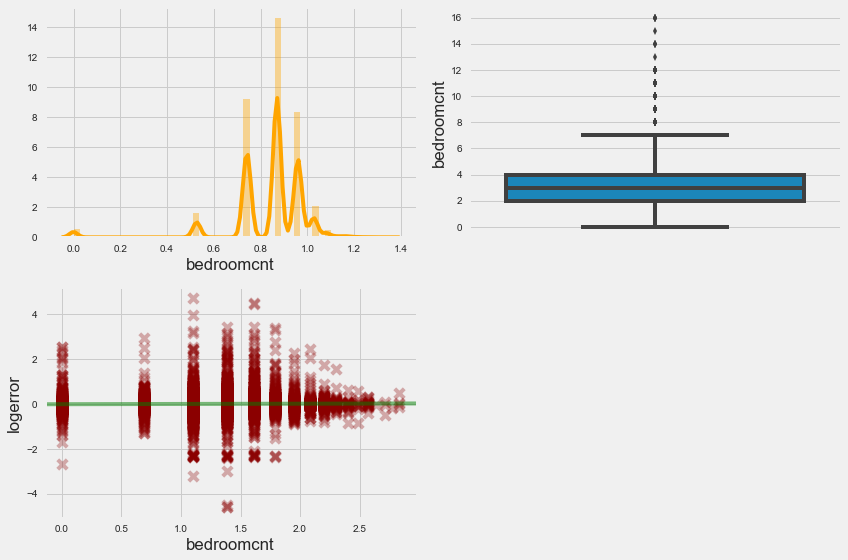

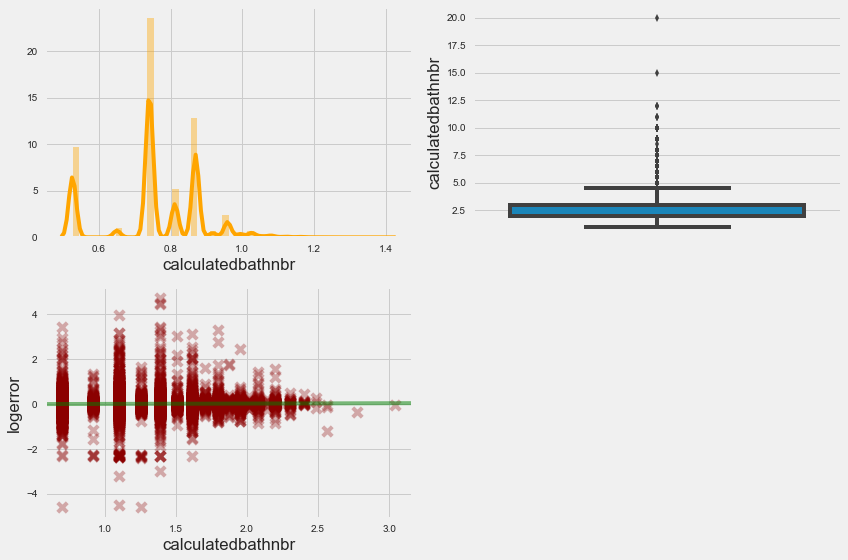

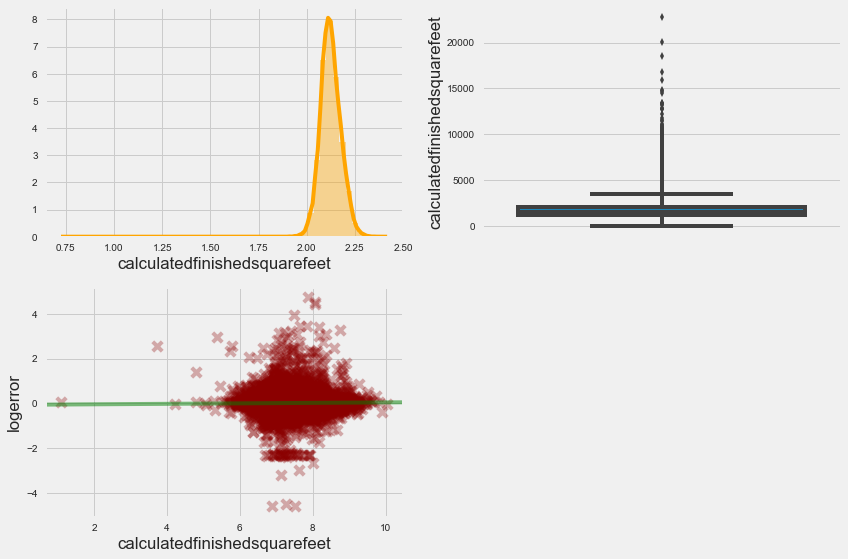

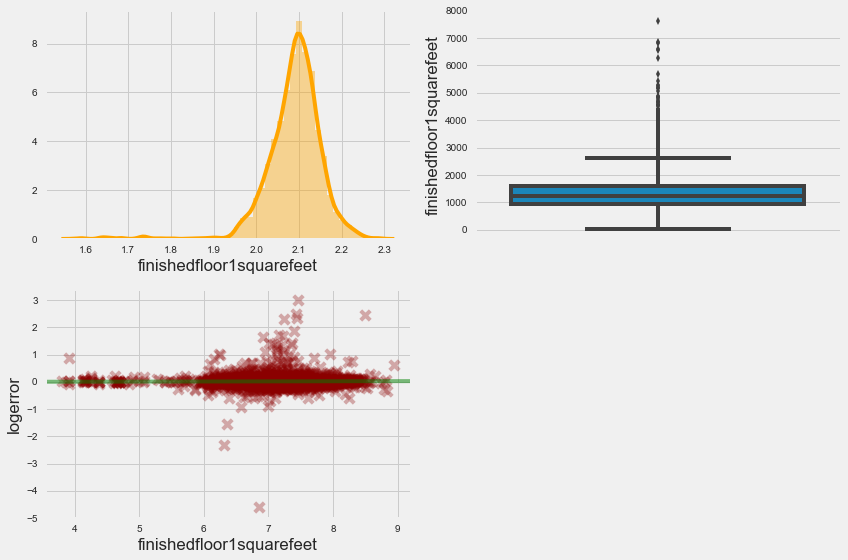

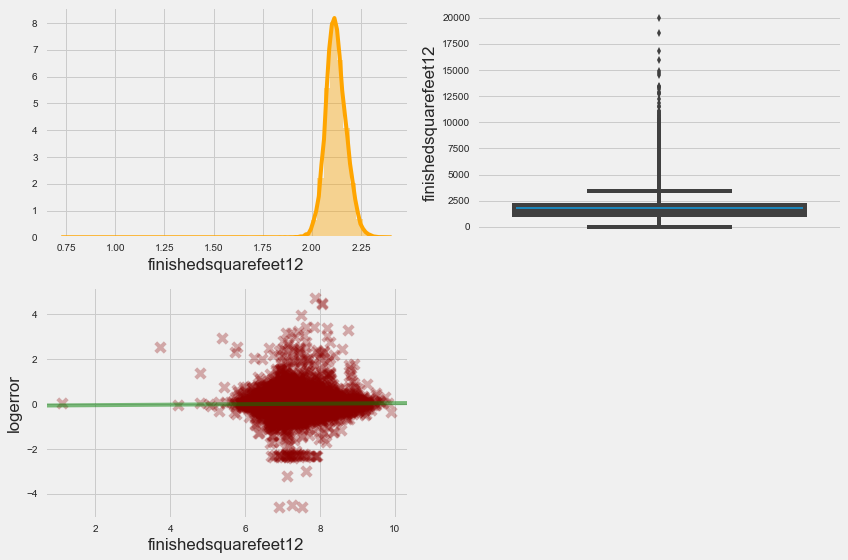

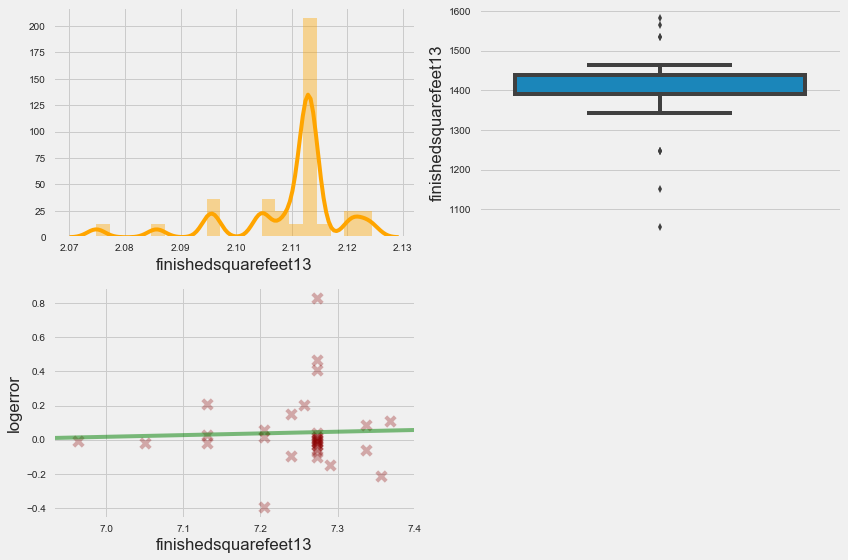

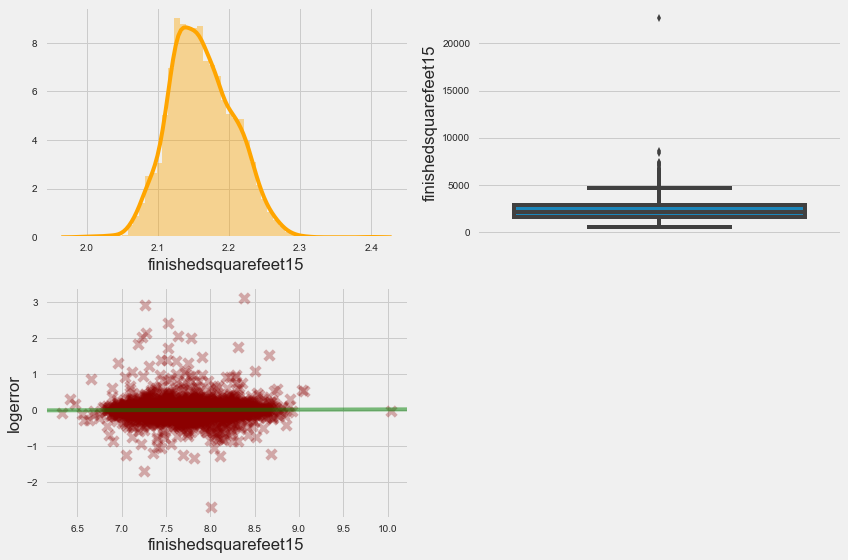

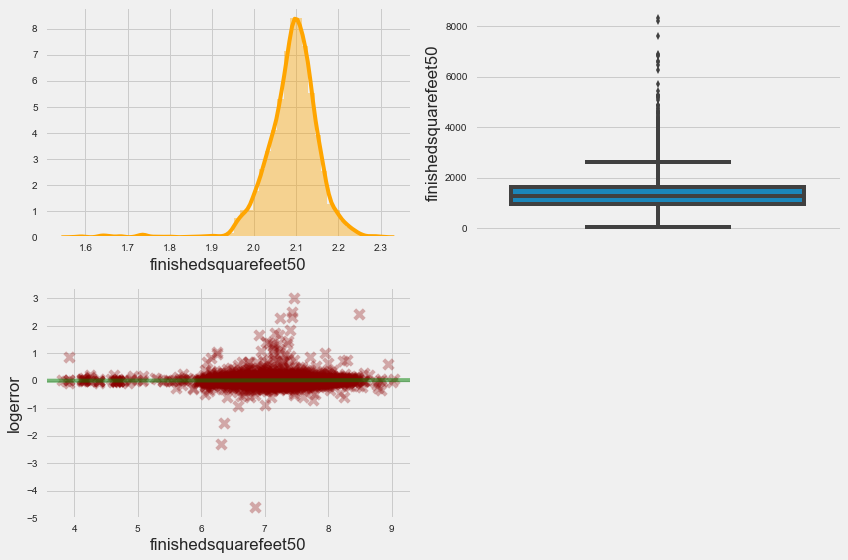

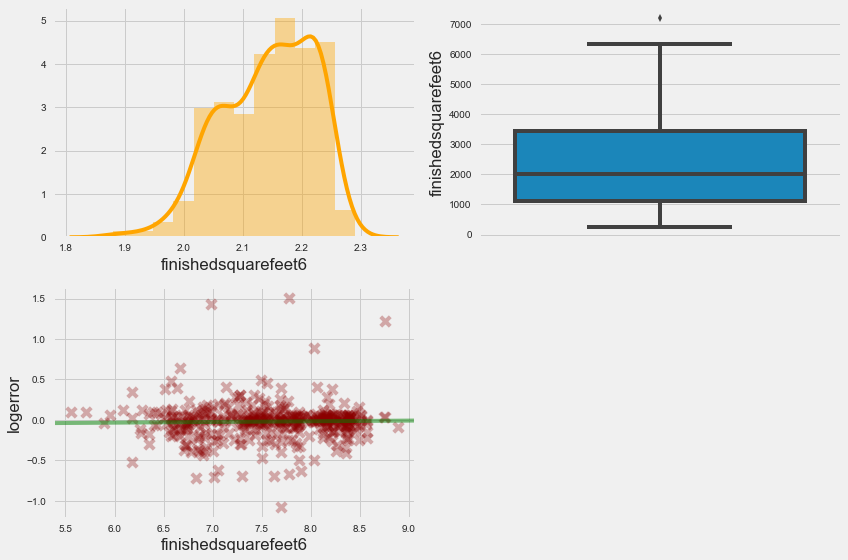

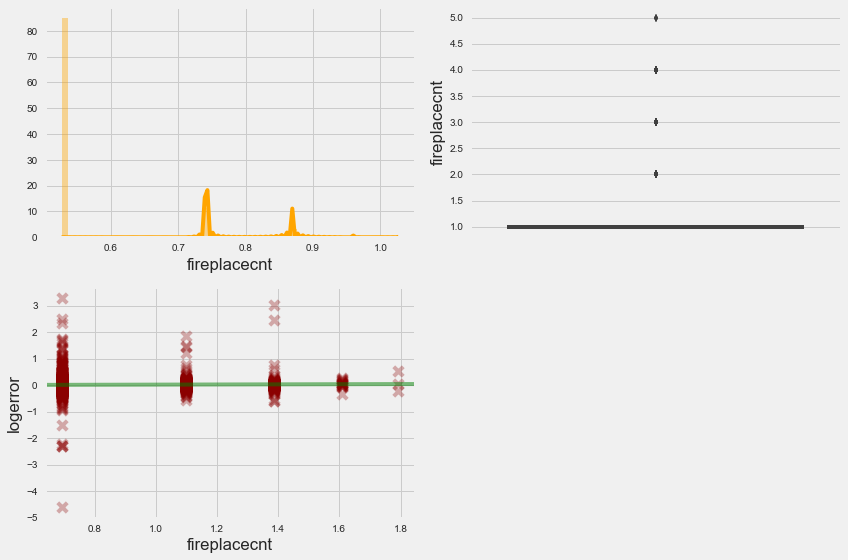

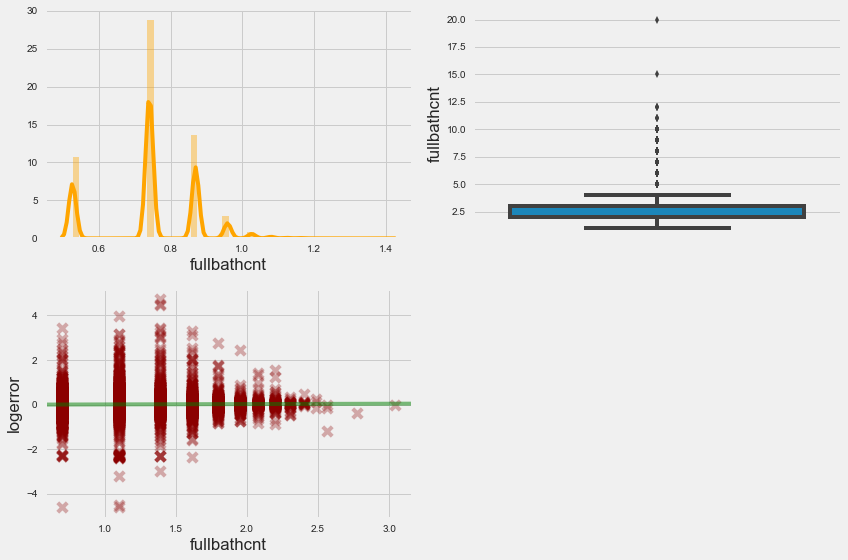

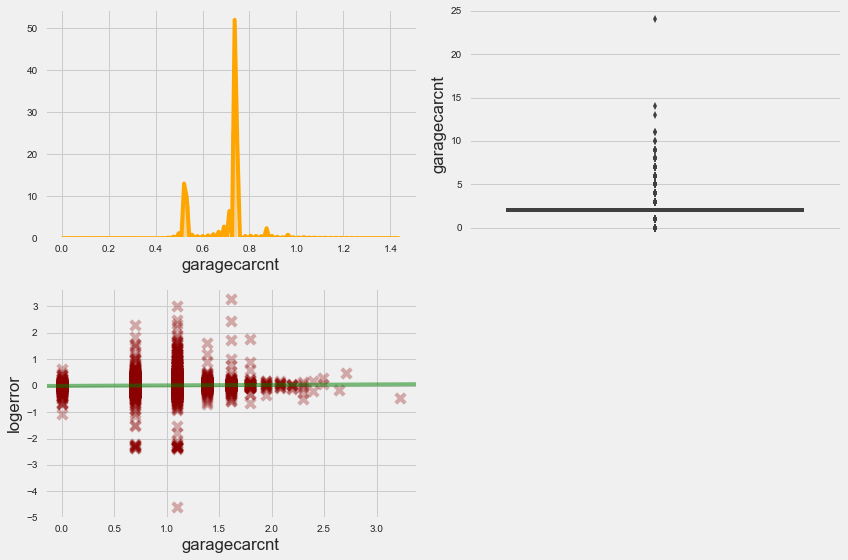

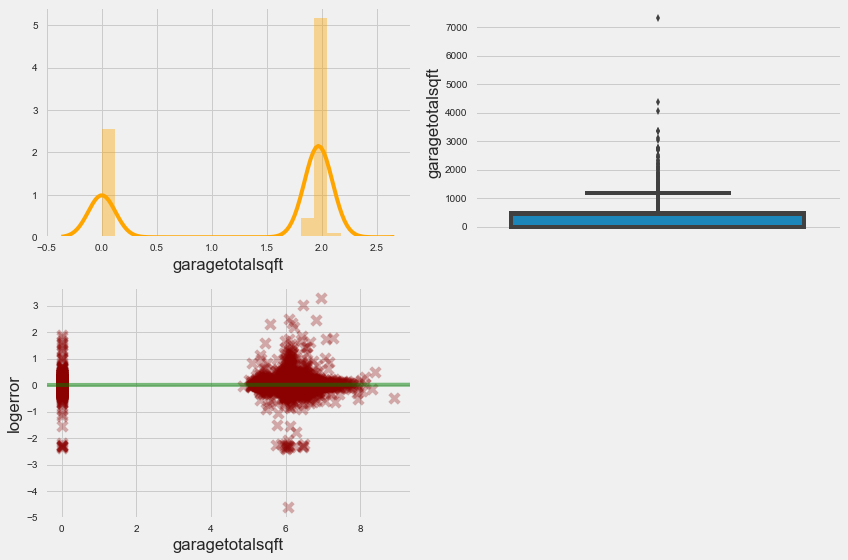

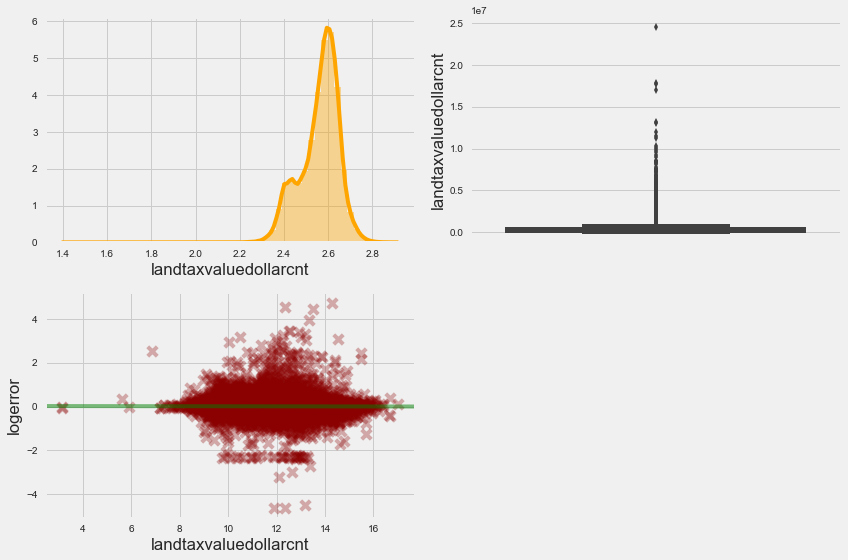

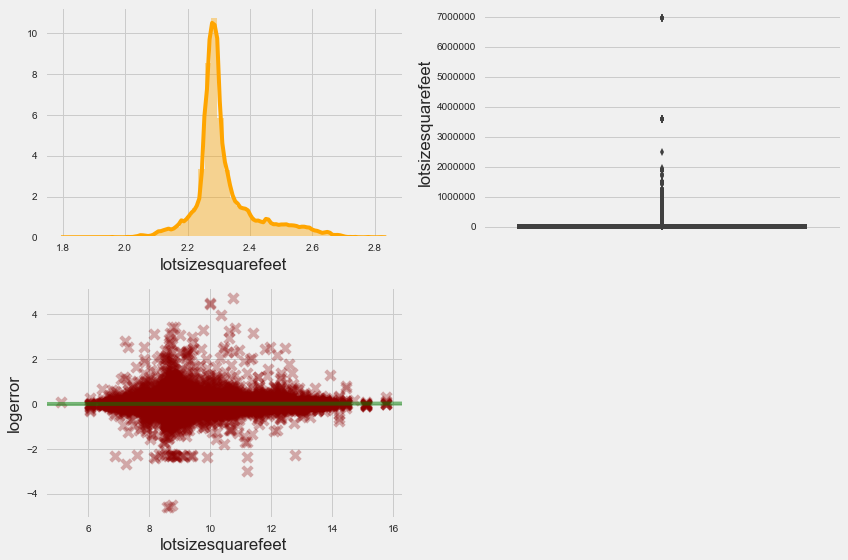

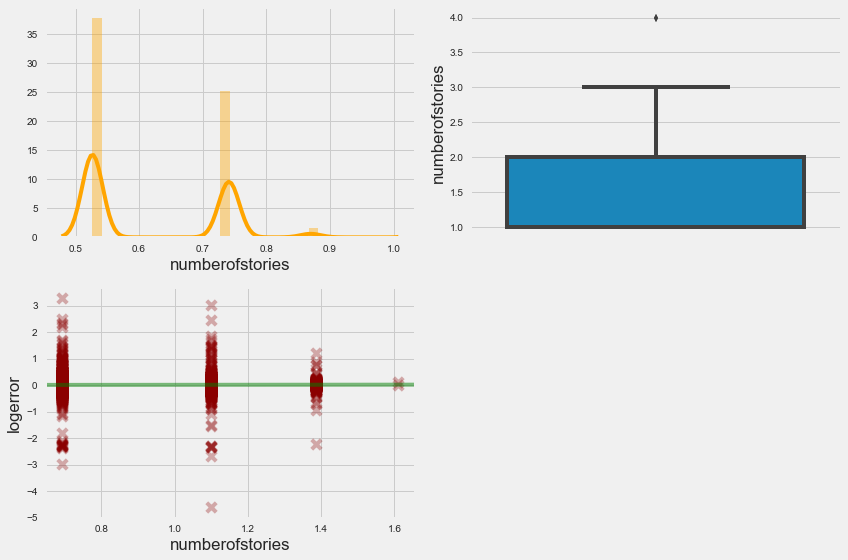

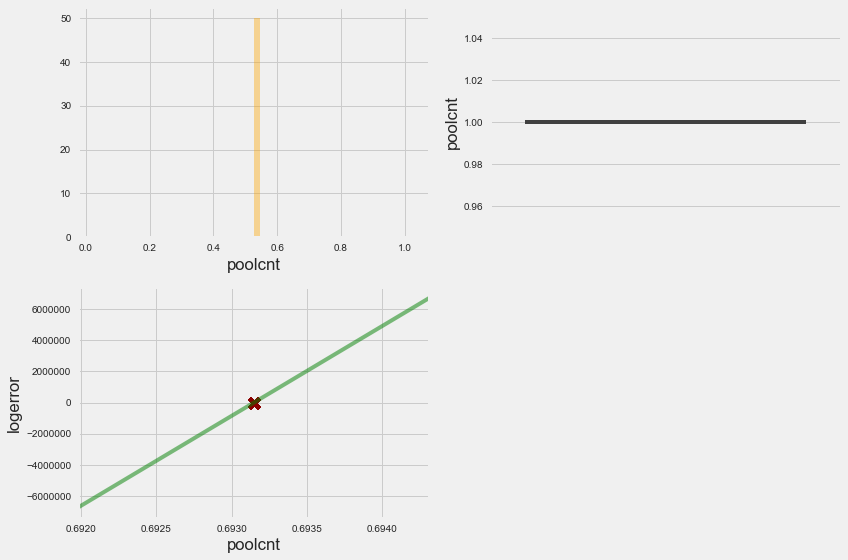

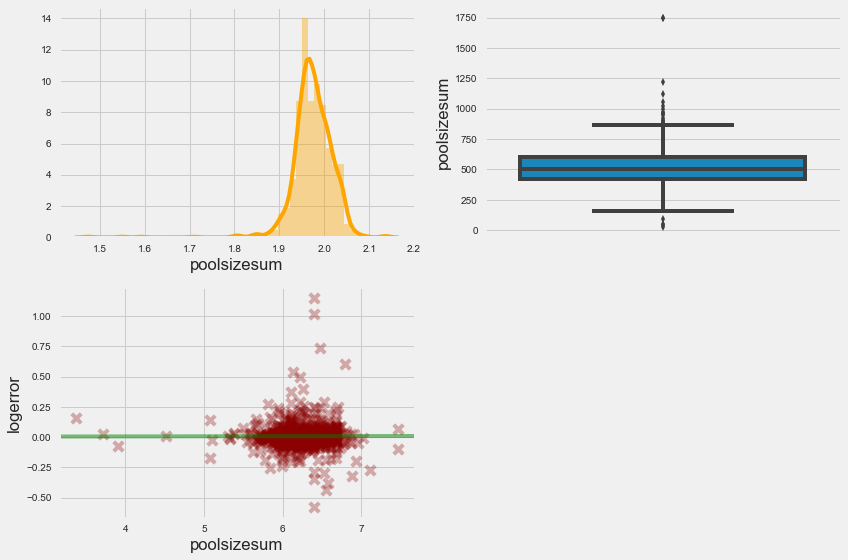

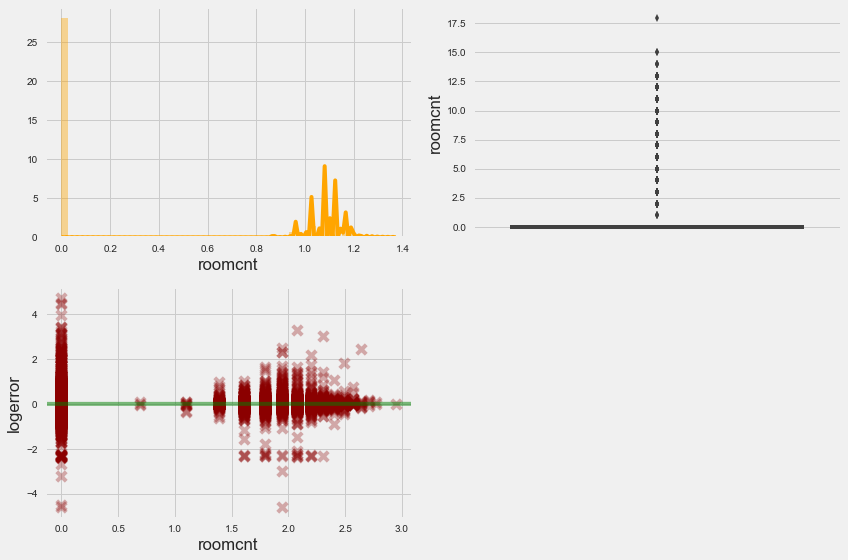

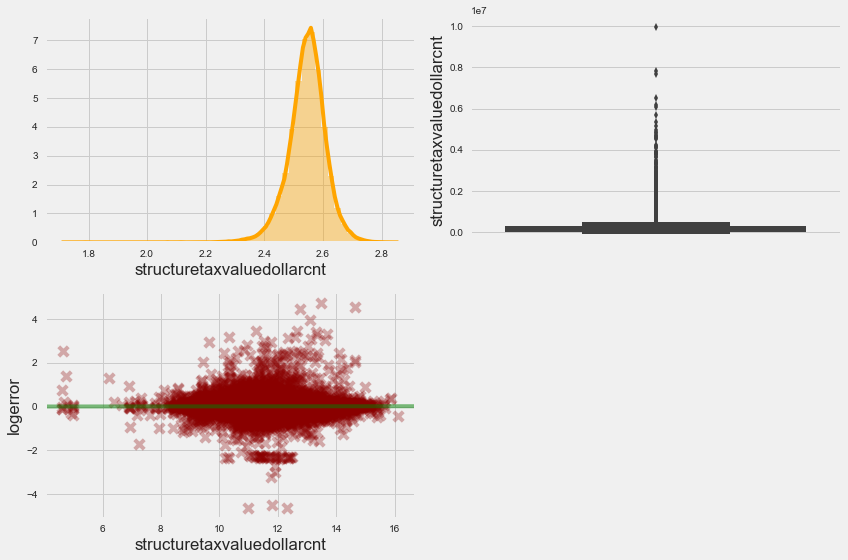

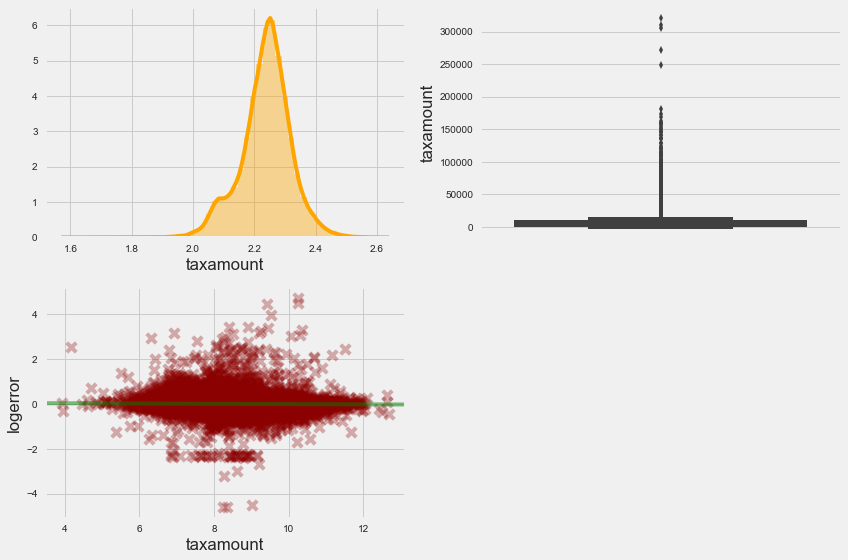

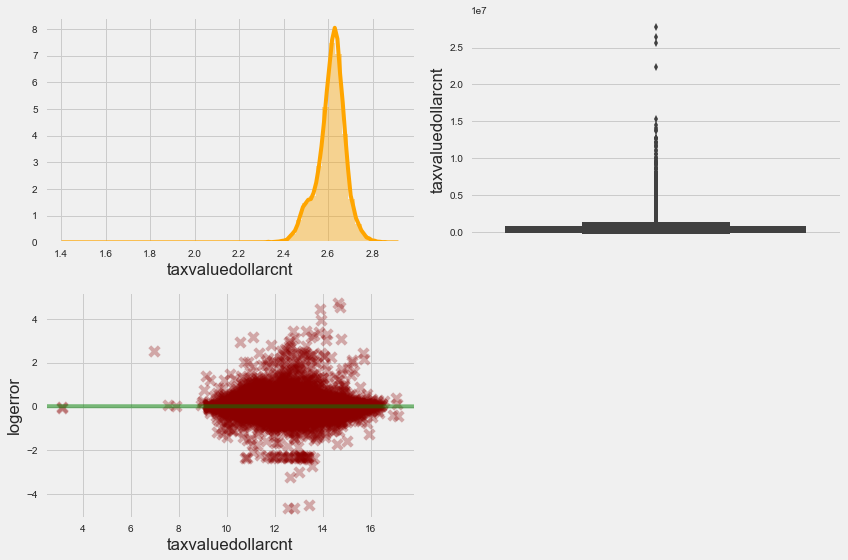

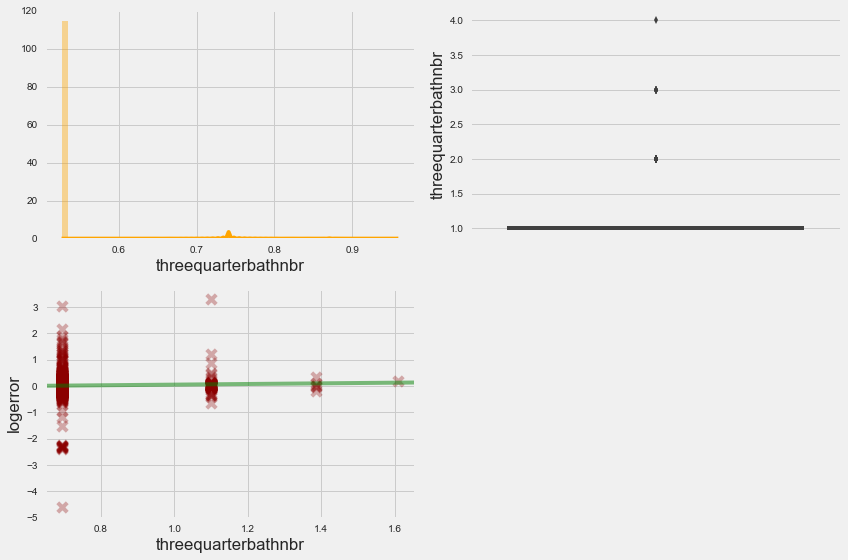

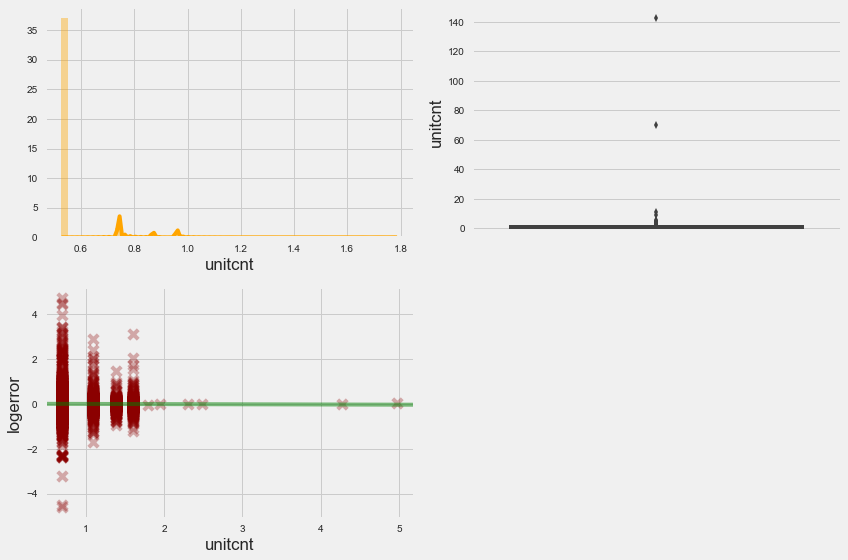

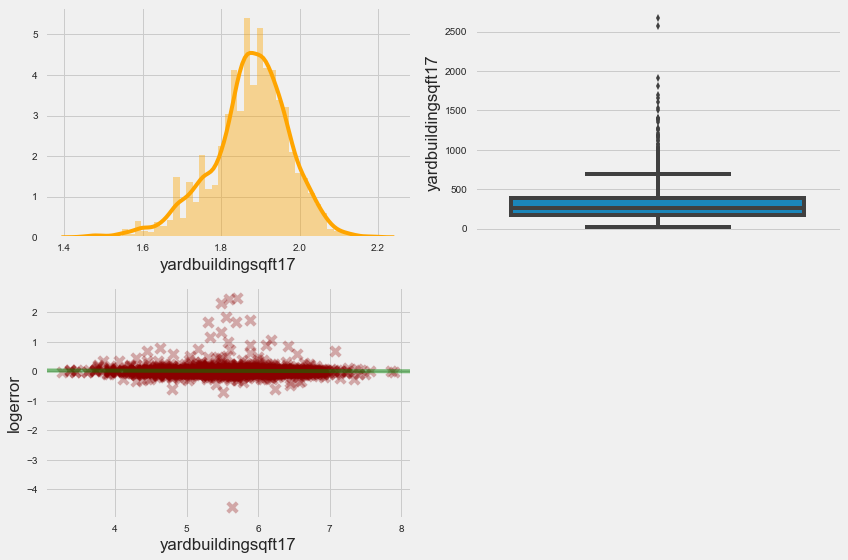

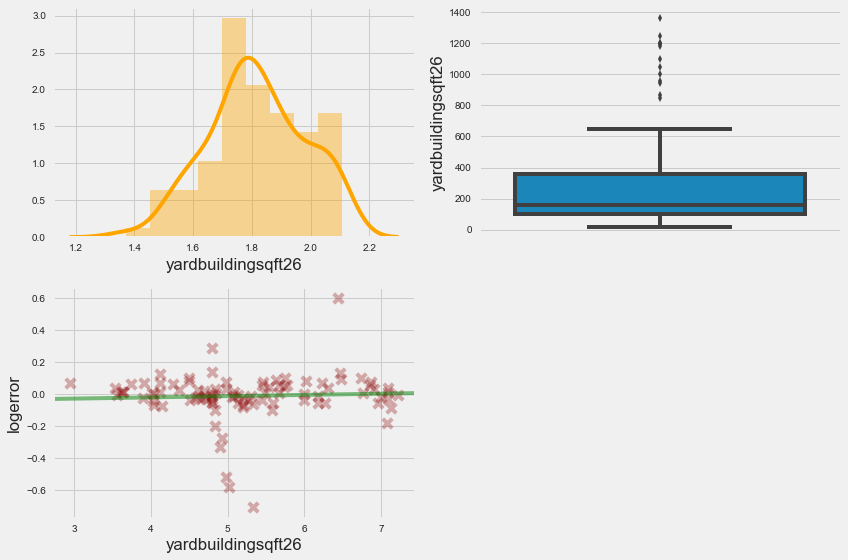

In [17]:
for i, col in enumerate(num_data.columns[1:]):
    fig = plt.figure(i,figsize=(12,8))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    
    # Log transformation for skewed data
    sns.boxplot(num_data[col].dropna(), orient='v', ax=ax2)
    plt.xlabel(col)
    
    num_data[col] = np.log1p(num_data[col].dropna())
    g = sns.regplot(x=col, y='logerror', data=num_data, ax=ax3 ,ci = False,
        scatter_kws={"color":"darkred","alpha":0.3,"s":90},
        line_kws={"color":"g","alpha":0.5,"lw":4},marker="x")
    
    sns.distplot(np.log1p(num_data[col].dropna()), color = "orange", kde = True, ax=ax1)

    plt.tight_layout()
    plt.show()

## Exploring data dictionary

In [18]:
workbook = pd.ExcelFile('data/zillow_data_dictionary.xlsx')

In [19]:
workbook.sheet_names

['Data Dictionary',
 'HeatingOrSystemTypeID',
 'PropertyLandUseTypeID',
 'StoryTypeID',
 'AirConditioningTypeID',
 'ArchitecturalStyleTypeID',
 'TypeConstructionTypeID',
 'BuildingClassTypeID']

In [20]:
data_dictionary = pd.read_excel('data/zillow_data_dictionary.xlsx')

In [21]:
sheet_features = {val:val.lower() for val in workbook.sheet_names[1:]}
sheet_features

{'AirConditioningTypeID': 'airconditioningtypeid',
 'ArchitecturalStyleTypeID': 'architecturalstyletypeid',
 'BuildingClassTypeID': 'buildingclasstypeid',
 'HeatingOrSystemTypeID': 'heatingorsystemtypeid',
 'PropertyLandUseTypeID': 'propertylandusetypeid',
 'StoryTypeID': 'storytypeid',
 'TypeConstructionTypeID': 'typeconstructiontypeid'}

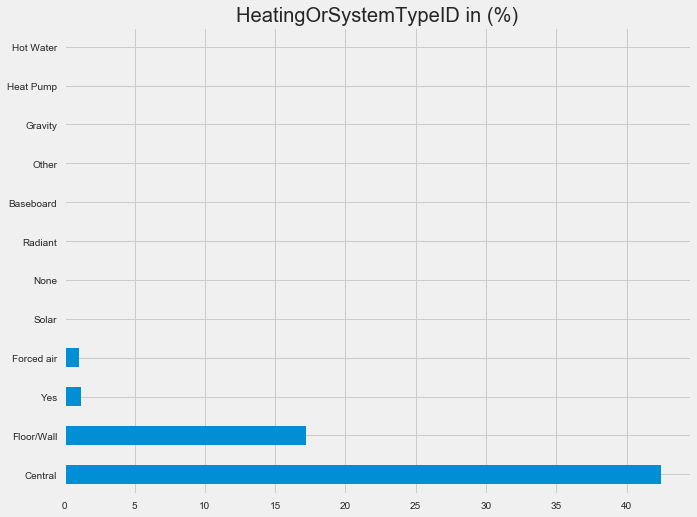

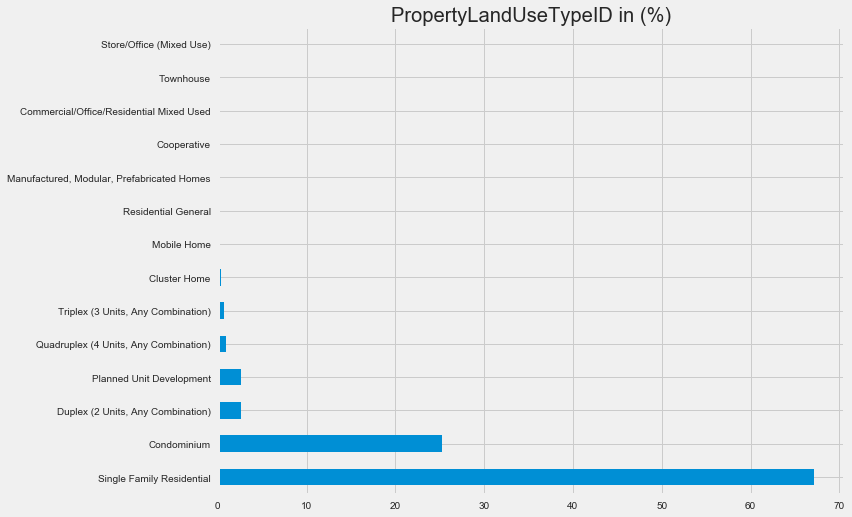

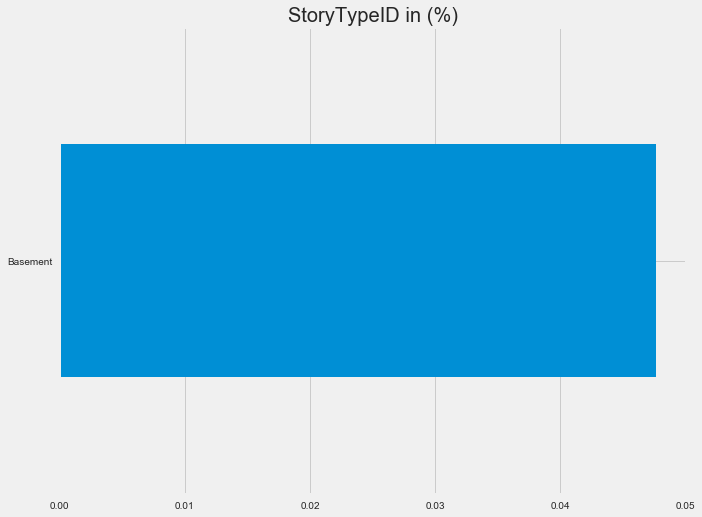

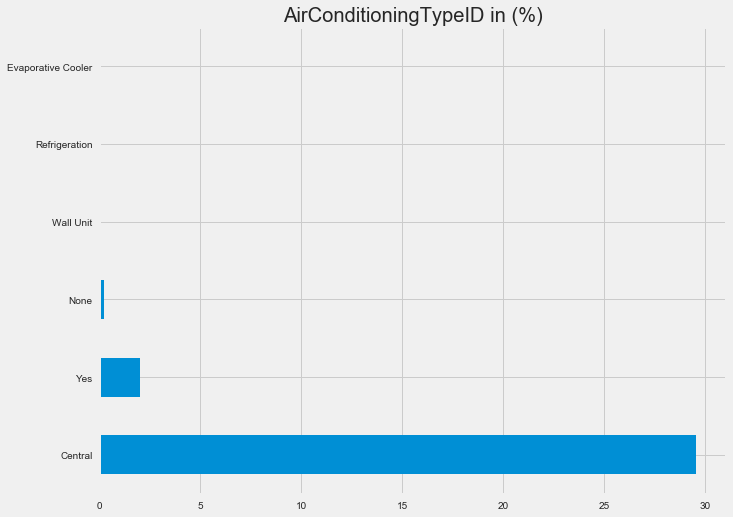

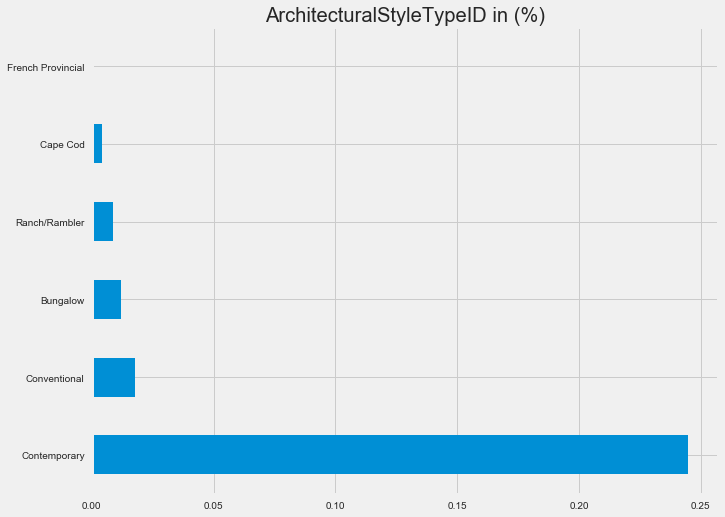

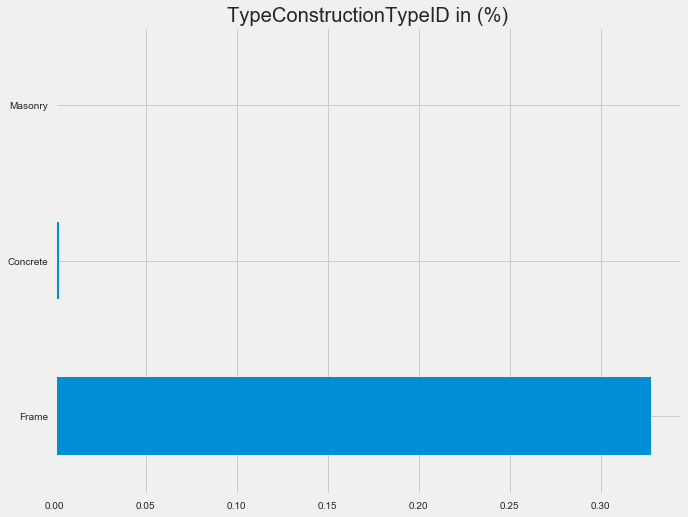

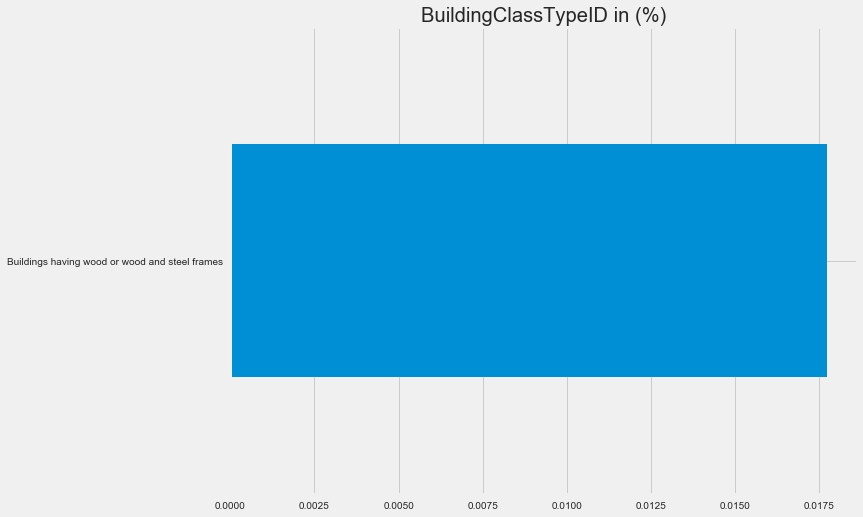

In [22]:
def look_up(num, sheet):
    return sheet[sheet[sheet.columns[0]] == num][sheet.columns[1]].values[0]
    
    
for sheet_name, sheet_feature in sheet_features.items():
    val_counts = joined_data[sheet_feature].value_counts()/len(joined_data) * 100
    sheet_data = pd.read_excel('data/zillow_data_dictionary.xlsx',sheetname=sheet_name)
    val_counts.index = [look_up(int(val), sheet_data) for val in val_counts.index]
    val_counts.plot(kind='barh',title=sheet_name + ' in (%)', figsize=(10,8))
    plt.show()

## Geographical distribution

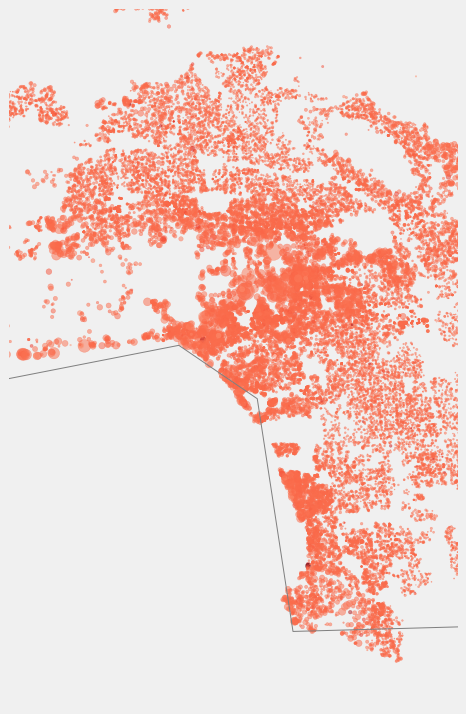

In [23]:
# Ref: 
# https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb
# 1. Draw the map background
scale=1000000
lon,lat = joined_data.longitude.values/scale, joined_data.latitude.values/scale

fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution='l', lat_0=37, lon_0=-123,
            llcrnrlon=-118.761333, llcrnrlat=33.679916,
            urcrnrlon=-118.175567, urcrnrlat=34.358850,
            width=1.4E6, height=1.3E6)

m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

m.drawstates(color='gray')
# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=joined_data.logerror.values*1000,s=joined_data.taxamount.values/1000,
          cmap='Reds', alpha=0.5)

#lower left: 33.679916, -118.761333
#upper right: 34.358850, -118.175567

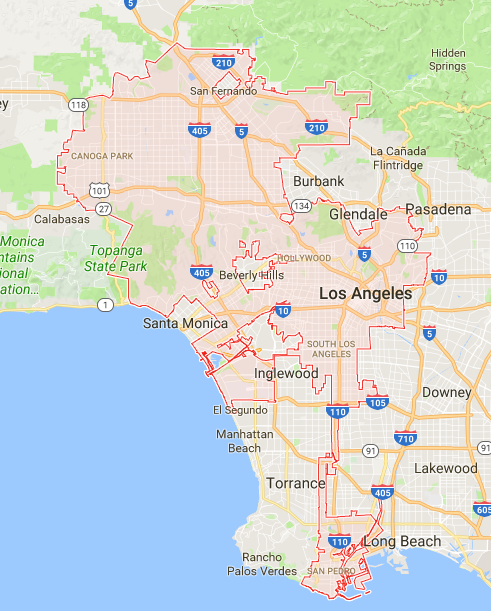

In [24]:
from IPython.display import Image
Image("images/greater_los_angeles.PNG")